In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_avg = ds_all.sel(ensemble=30)
ds_all = ds_all.sel(ensemble=slice(0,30),time=slice('1990-01-01','2100-12-31'))

In [3]:
experiment26 = 'OCN/METABOLIC_INDEX/RCP26'
filename = 'MI_hitemp_sens_k01_ens*_1x1_2006_2100.nc'
path = rootdir+experiment26+'/'+filename
ds_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_avg26 = ds_all26.sel(ensemble=30)
ds_all26 = ds_all26.sel(ensemble=slice(0,29))

In [4]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_2006_2100.nc'
path = rootdir+experiment26+'/'+filename
k11_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg26 = k11_all26.sel(ensemble=30)
k11_all26 = k11_all26.sel(ensemble=slice(0,29))

In [5]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg = k11_all.sel(ensemble=30)
k11_all = k11_all.sel(ensemble=slice(0,29),time=slice('1990-01-01','2100-12-31'))

In [ ]:
ds_2100 = ds_avg.sel(time=slice('2100-01-01','2100-12-31'))
month_emerge = ~np.isnan(ds_2100.where(ds_2100['MI']<1))


In [7]:
ds_2100 = ds_avg.sel(time=slice('2100-01-01','2100-12-31'))
# ds_month = ds_2100.groupby('time.month')
# ds_sort = ~np.isnan(ds_2100.where(ds_2100['MI']<1.0))
month_emerge = ~np.isnan(ds_2100.where(ds_2100['MI']<1))
monthly = month_emerge.groupby('time')
month = monthly['MI'].min(dim='time')
# month_emerge = ds_month.where(ds_month['MI']<1).min(dim='time')

DatasetGroupBy, grouped over 'time' 
12 groups with labels 2100-01-16, 12:00:00, ..., 2100-12-16, 12:00:00.

In [14]:
monthly

DatasetGroupBy, grouped over 'time' 
12 groups with labels 2100-01-16, 12:00:00, ..., 2100-12-16, 12:00:00.

In [11]:
month_emerge

<xarray.Dataset>
Dimensions:   (time: 12, xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) object 2100-01-16 12:00:00 ... 2100-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    MI        (time, yt_ocean, xt_ocean) bool dask.array<chunksize=(12, 180, 360), meta=np.ndarray>

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


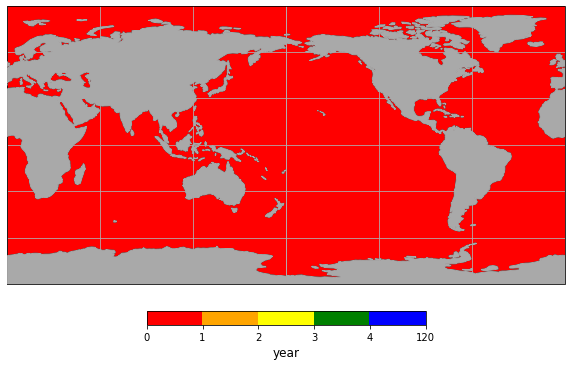

In [10]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
crs = ccrs.PlateCarree()

X = month['xt_ocean']
Y = month['yt_ocean']  
Z = month.squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('year',fontsize=12)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


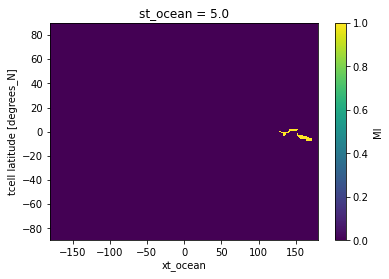

In [7]:
month.plot()

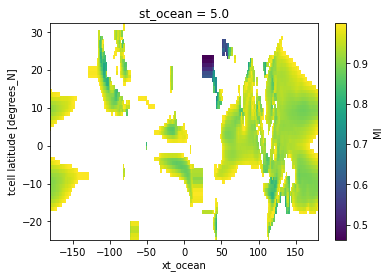

In [128]:
month['MI'].plot()

In [10]:
z0_red85 = ds_month(ds_all, 1.0)
z0_or85 = ds_month(ds_all, 2.0)
z0_yel85 = ds_month(ds_all, 3.0)
z0_gr85 = ds_month(ds_all, 4.0)

k11_red85 = ds_month(k11_all, 1.0)
k11_or85 = ds_month(k11_all, 2.0)
k11_yel85 = ds_month(k11_all, 3.0)
k11_gr85 = ds_month(k11_all, 4.0)

z0_red26 = ds_month(ds_all26, 1.0)
z0_or26 = ds_month(ds_all26, 2.0)
z0_yel26 = ds_month(ds_all26, 3.0)
z0_gr26 = ds_month(ds_all26, 4.0)

k11_red26 = ds_month(k11_all26, 1.0)
k11_or26 = ds_month(k11_all26, 2.0)
k11_yel26 = ds_month(k11_all26, 3.0)
k11_gr26 = ds_month(k11_all26, 4.0)

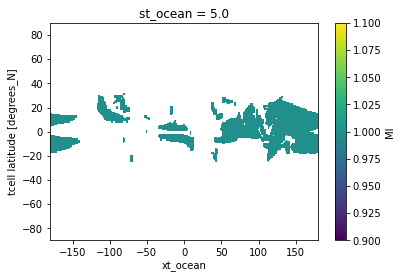

In [121]:
month_emerge['MI'].plot()

In [9]:
def ds_month(ds, thresh):
    mi = ds.squeeze()
    mi_thresh = ~np.isnan(mi.where(mi['MI']<thresh))
    mi_month = mi_thresh.groupby('time.year').sum(dim='time')
    mi_mean = mi_month.mean(dim='ensemble')
    return mi_mean

In [11]:
z0_red85 = ds_month(ds_all, 1.0)
z0_or85 = ds_month(ds_all, 2.0)
z0_yel85 = ds_month(ds_all, 3.0)
z0_gr85 = ds_month(ds_all, 4.0)

k11_red85 = ds_month(k11_all, 1.0)
k11_or85 = ds_month(k11_all, 2.0)
k11_yel85 = ds_month(k11_all, 3.0)
k11_gr85 = ds_month(k11_all, 4.0)

z0_red26 = ds_month(ds_all26, 1.0)
z0_or26 = ds_month(ds_all26, 2.0)
z0_yel26 = ds_month(ds_all26, 3.0)
z0_gr26 = ds_month(ds_all26, 4.0)

k11_red26 = ds_month(k11_all26, 1.0)
k11_or26 = ds_month(k11_all26, 2.0)
k11_yel26 = ds_month(k11_all26, 3.0)
k11_gr26 = ds_month(k11_all26, 4.0)

In [3]:
red = func.get_red(ds_all, 43210)

In [22]:
red

<xarray.DataArray 'MI' (time: 1812)>
dask.array<mean_agg-aggregate, shape=(1812,), dtype=float64, chunksize=(1812,), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 5.0
  * time      (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00

In [11]:
ds_1990 = ds_all.squeeze().groupby('time.year').mean().sel(year=1990)
red_init = ~np.isnan(ds_1990.where(ds_1990['MI']<1.0))
ds_rInit = red_init['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
red_init = ds_rInit.mean(dim='ensemble')

In [44]:
ds_year = ds_all.groupby('time.year').mean().sel(year=2070)
ds_red = ~np.isnan(ds_year.where(ds_year['MI']<1.0))
ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
ds_2070 = ds_rSum.mean(dim='ensemble')

In [45]:
ds_year = ds_all.groupby('time.year').mean()
ds_red = ~np.isnan(ds_year.where(ds_year['MI']<1.0))
ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
ds_rPercent = (ds_rSum/ds_2070)*100
ds_rAvg = ds_rPercent.mean(dim='ensemble')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


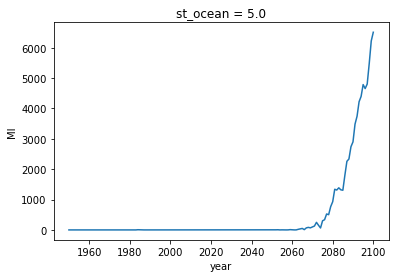

In [46]:
ds_rAvg.plot()

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


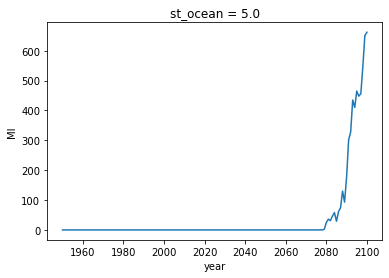

In [21]:
ds_year = ds_avg.groupby('time.year').mean()
# ds_1990 = ds_year.sel(year=1990)
red_1990 = ~np.isnan(ds_year.where(ds_year['MI']<1.0))
sum_1990 = red_1990.sum(dim='xt_ocean').sum(dim='yt_ocean')
sum_1990['MI'].plot()

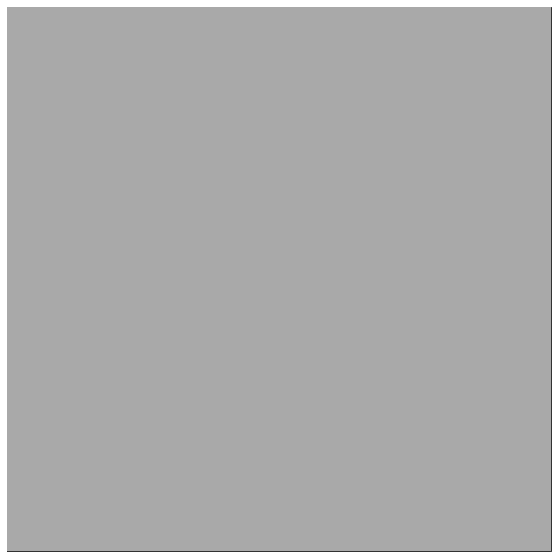

In [13]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
clevs = np.array([0,1,2,3,4,120])
colorange = ['red', 'orange', 'yellow','green','blue']
crs = ccrs.PlateCarree()
X = ds_avg['xt_ocean']
Y = ds_avg['yt_ocean']  
Z = ds_avg['MI'].sel(time='2100-01-16').squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)

ax.set_extent([179.5,-178.5,-64.5,-62.5])

# Add a land mask to your plot, as well as grid lines and coastlines
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()

In [4]:
lat = np.arange(-89.5,90.5,1)
lon = np.arange(-179.5,180.5,1)

In [14]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_avg['xt_ocean'],'yt_ocean':ds_avg['yt_ocean']})
oceanmask = np.isfinite(ds_avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)

In [ ]:
ds_red = ~np.isnan(ds_all.where(ds_all['MI']<1.0))
ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
ds_rPercent = (ds_rSum/total)*100
ds_rAvg = ds_rPercent.mean(dim='ensemble')

# Time of Emergence

In [14]:
z0_red85

,Array,Chunk
Bytes,57.54 MB,518.40 kB
Shape,"(111, 180, 360)","(1, 180, 360)"
Count,21475 Tasks,111 Chunks
Type,float64,numpy.ndarray


In [28]:
da_rcp85 = []
da_rcp85.append('placeholder')
for i in range(1,13):
    da_emerge = z0_red85.year.where(z0_red85>=i).min(dim='year')
    da_rcp85.append(da_emerge)

In [29]:
ds_group = ds_avg.groupby('time.year').min()
da_emergeYear = ds_group.year.where(ds_group['MI']<1.0).min(dim='year')

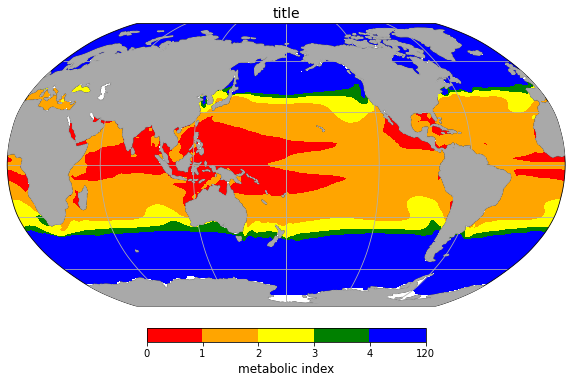

In [25]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.graph(ds_avg, ax, 'title', 2100, None, False)

In [27]:
da_emergeYear

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    MI        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>

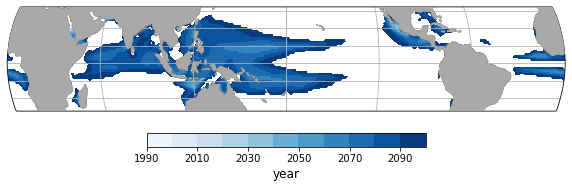

In [31]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
# func.graph(ds_avg, ax, 'title', '2100-01-16', None, False)
wn.filterwarnings('ignore')
years = np.arange(1990,2110,10)
crs = ccrs.PlateCarree()
X = da_emergeYear['xt_ocean']
Y = da_emergeYear['yt_ocean']
Z = da_emergeYear.squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax.contourf(X,Y,Z,years,cmap='Blues',transform=crs)
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('year',fontsize=12)

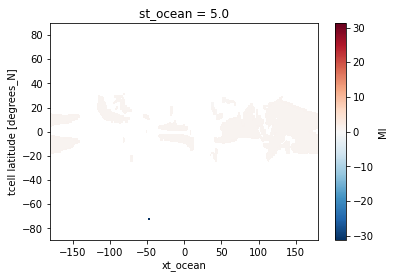

In [21]:
da_emergeYear['MI'].plot()

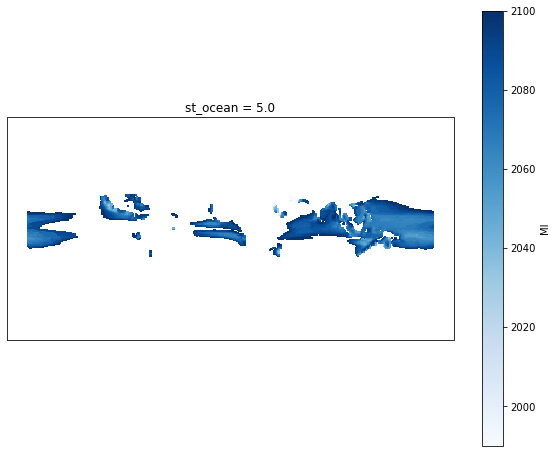

In [61]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
da_rcp85[1].MI.plot(ax=ax,cmap='Blues')

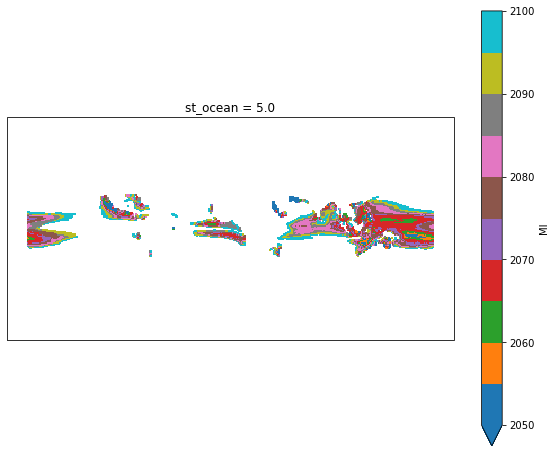

In [46]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
da_rcp85[1].MI.plot(ax=ax,cmap='tab10',robust=True)

In [13]:
def map_years(da, ax, month, title):
    wn.filterwarnings('ignore')
    years = np.arange(1990,2110,10)
    crs = ccrs.PlateCarree()
    X = da[month]['xt_ocean']
    Y = da[month]['yt_ocean']
    Z = da[month]['MI'].squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = ax.contourf(X,Y,Z,years,cmap='Blues',transform=crs)
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.gridlines()
    ax.coastlines()
    ax.set_title(title)
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
    cbar.set_label('year',fontsize=12)

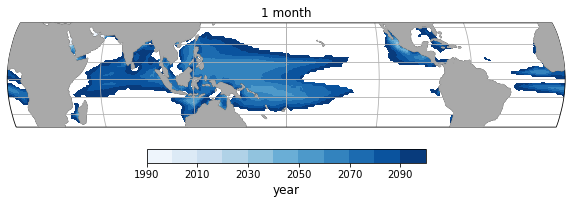

In [14]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
map_years(da_rcp85, ax, 1, '1 month')

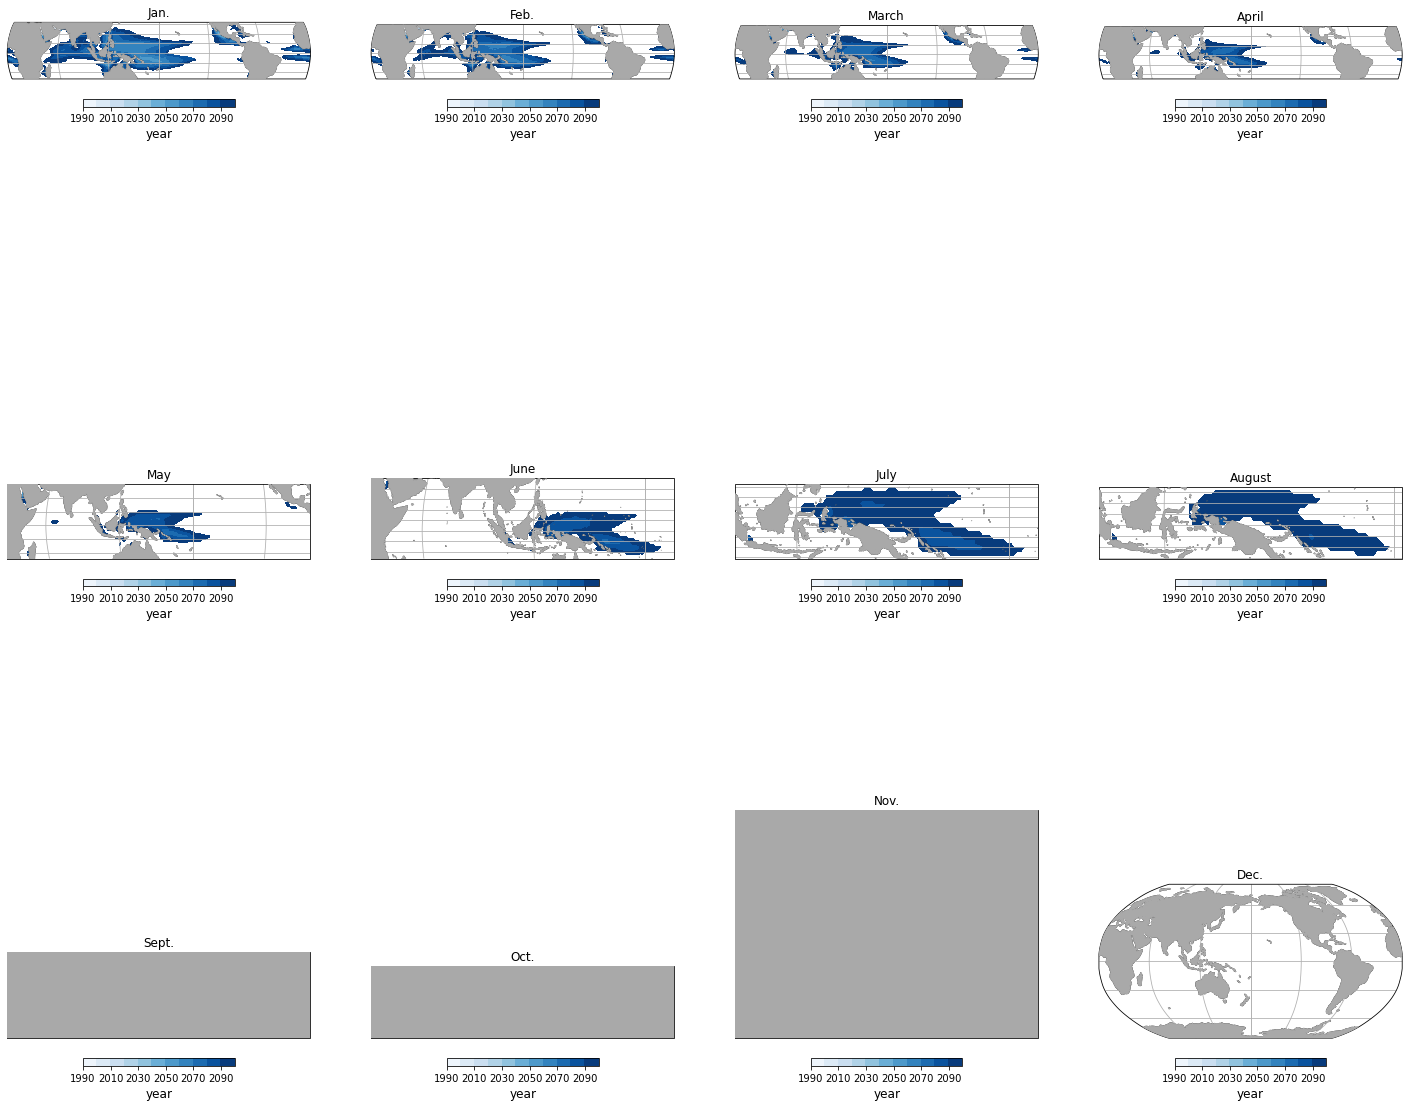

In [116]:
fig,axs = plt.subplots(figsize=(25,25),nrows=3,ncols=4,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
map_years(da_rcp85, axs[0,0], 1, 'Jan.')
map_years(da_rcp85, axs[0,1], 2, 'Feb.')
map_years(da_rcp85, axs[0,2], 3, 'March')
map_years(da_rcp85, axs[0,3], 4, 'April')
map_years(da_rcp85, axs[1,0], 5, 'May')
map_years(da_rcp85, axs[1,1], 6, 'June')
map_years(da_rcp85, axs[1,2], 7, 'July')
map_years(da_rcp85, axs[1,3], 8, 'August')
map_years(da_rcp85, axs[2,0], 9, 'Sept.')
map_years(da_rcp85, axs[2,1], 10, 'Oct.')
map_years(da_rcp85, axs[2,2], 11, 'Nov.')
map_years(da_rcp85, axs[2,3], 12, 'Dec.')

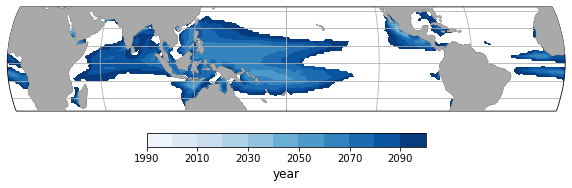

In [66]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
# func.graph(ds_avg, ax, 'title', '2100-01-16', None, False)
wn.filterwarnings('ignore')
years = np.arange(1990,2110,10)
crs = ccrs.PlateCarree()
X = da_rcp85[1]['xt_ocean']
Y = da_rcp85[1]['yt_ocean']
Z = da_rcp85[1]['MI'].squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax.contourf(X,Y,Z,years,cmap='Blues',transform=crs)
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('year',fontsize=12)

In [40]:
ds_year = z0_red85.where(z0_red85['MI']>=6).min(dim='year')

In [43]:
ds_year

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    MI        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [39]:
da_rcp85[6].sum(dim='xt_ocean').sum(dim='yt_ocean')

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    st_ocean  float64 5.0
Data variables:
    MI        float64 dask.array<chunksize=(), meta=np.ndarray>

In [31]:
ds_2100 = ds_avg.sel(time=slice('2100-01-01','2100-12-31'))
mi_thresh = ~np.isnan(ds_2100.where(ds_2100['MI']<1.0))
ds_emerge = mi_thresh.where(mi_thresh['MI']==1.0).min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


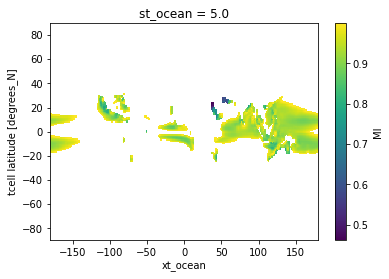

In [26]:
ds_emerge['MI'].plot()

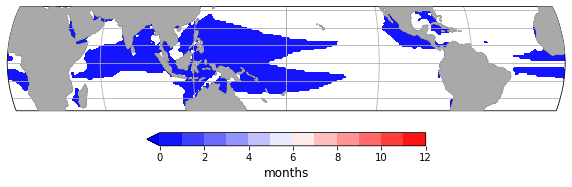

In [32]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
wn.filterwarnings('ignore')
months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
crs = ccrs.PlateCarree()
X = ds_emerge['xt_ocean']
Y = ds_emerge['yt_ocean']
Z = ds_emerge['MI'].squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax.contourf(X,Y,Z,months,cmap='bwr',transform=crs,extend='min')
    
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.gridlines()
ax.coastlines()
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

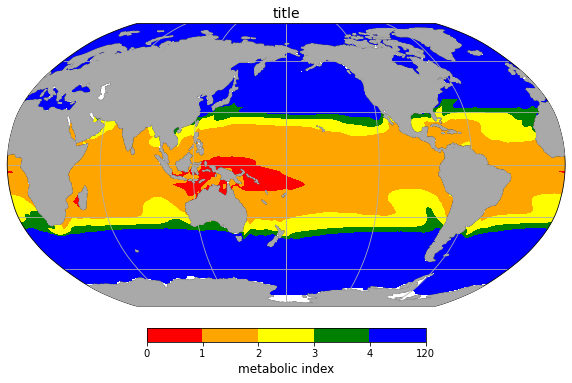

In [29]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.graph(ds_avg, ax, 'title', '2100-01-16', None, False)

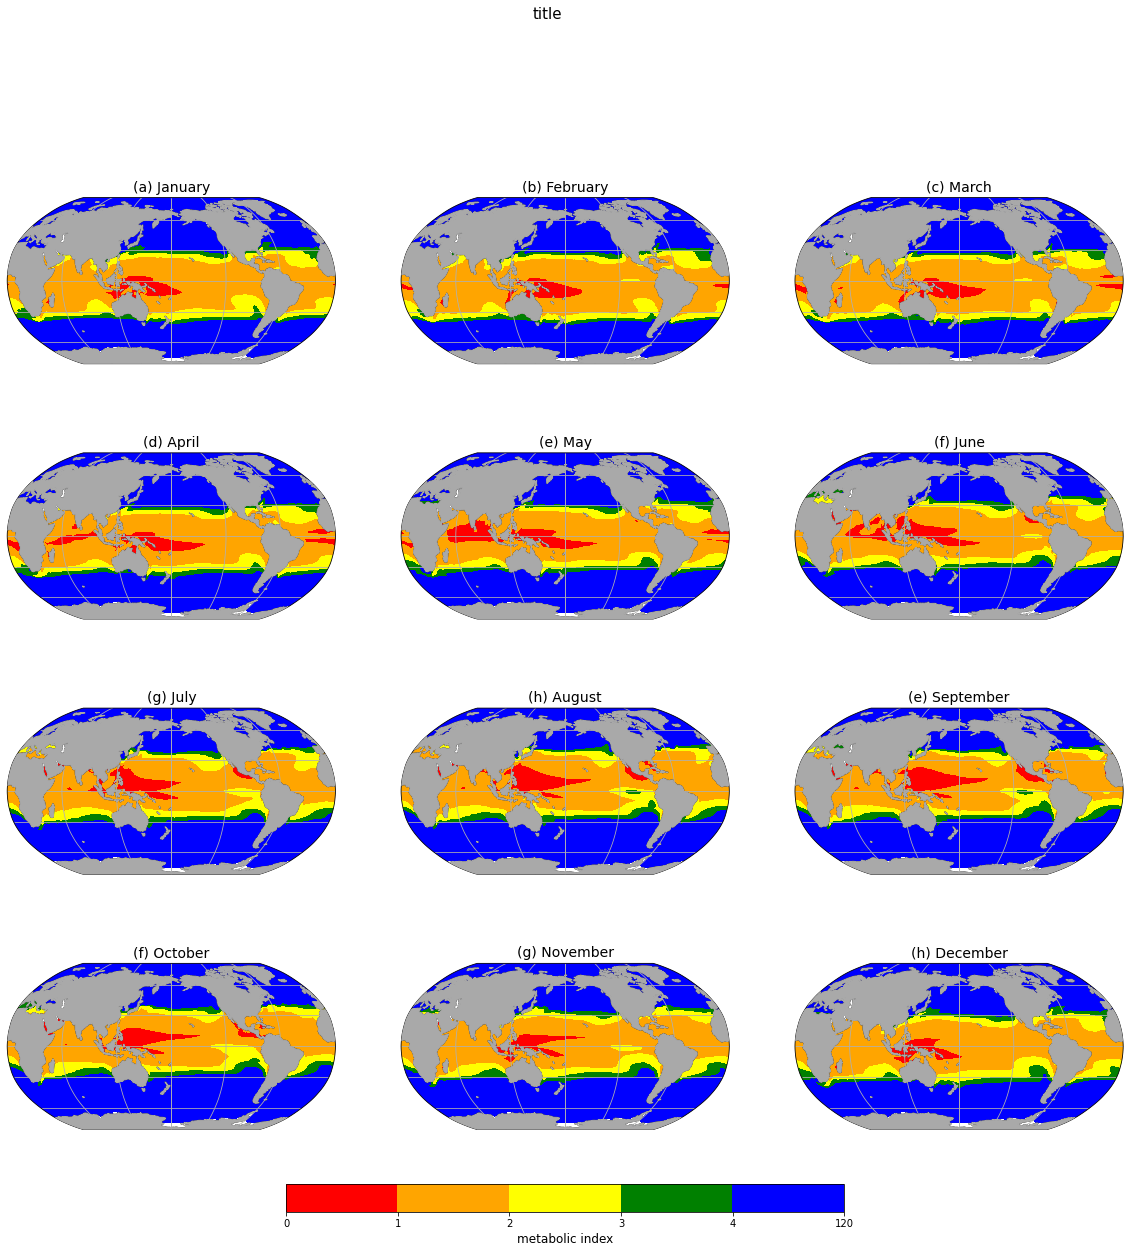

In [30]:
func.months_of_year(ds_avg,'2100','title')

In [20]:
z0_red2100

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    year      int64 2100
Data variables:
    MI        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [25]:
z0_red85.sel(year=2100).where(z0_red85>1).min(dim='year')

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    MI        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [19]:
ds = ds_avg.where(ds_avg['MI']<1.0).groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


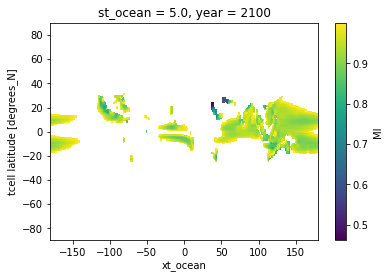

In [22]:
ds['MI'].sel(year=2100).plot()

# Percent Area

In [98]:
def percent_month(ds, month):
    byMonth = ~np.isnan(ds.where(ds['MI']>=month))
    percent_sum = byMonth['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    percent = (percent_sum/43210)*100
    return percent

In [105]:
z0red_1 = percent_month(z0_red85, 1)
z0red_3 = percent_month(z0_red85, 3)
z0red_6 = percent_month(z0_red85, 6)
z0red_9 = percent_month(z0_red85, 9)
z0red_12 = percent_month(z0_red85, 12)

In [106]:
z0or_1 = percent_month(z0_or85, 1)
z0or_3 = percent_month(z0_or85, 3)
z0or_6 = percent_month(z0_or85, 6)
z0or_9 = percent_month(z0_or85, 9)
z0or_12 = percent_month(z0_or85, 12)

In [107]:
z0yel_1 = percent_month(z0_yel85, 1)
z0yel_3 = percent_month(z0_yel85, 3)
z0yel_6 = percent_month(z0_yel85, 6)
z0yel_9 = percent_month(z0_yel85, 9)
z0yel_12 = percent_month(z0_yel85, 12)

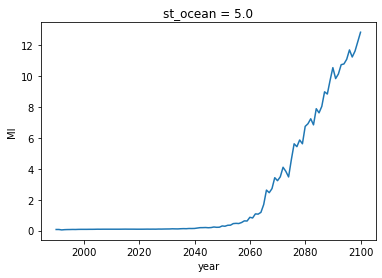

In [79]:
percent_1['MI'].plot()

In [73]:
percent_sum = percent.sum(dim='xt_ocean').sum(dim='yt_ocean')
percent = (percent_sum/43210)*100

In [92]:
percent_1

,Array,Chunk
Bytes,888 B,8 B
Shape,"(111,)","(1,)"
Count,22585 Tasks,111 Chunks
Type,float64,numpy.ndarray


Text(0.5, 1.0, 'MI < 3')

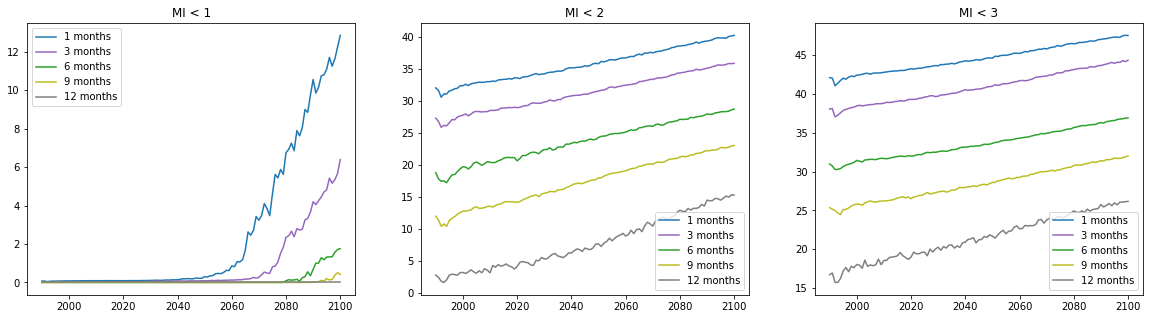

In [112]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(20,5),nrows=1,ncols=3)
ax0.plot(np.unique(z0red_1['year']),z0red_1,color='tab:blue',label='1 months')
ax0.plot(np.unique(z0red_3['year']),z0red_3,color='tab:purple',label='3 months')
ax0.plot(np.unique(z0red_6['year']),z0red_6,color='tab:green',label='6 months')
ax0.plot(np.unique(z0red_9['year']),z0red_9,color='tab:olive',label='9 months')
ax0.plot(np.unique(z0red_12['year']),z0red_12,color='tab:gray',label='12 months')
ax0.legend()
ax0.set_title('MI < 1')
ax1.plot(np.unique(z0or_1['year']),z0or_1,color='tab:blue',label='1 months')
ax1.plot(np.unique(z0or_3['year']),z0or_3,color='tab:purple',label='3 months')
ax1.plot(np.unique(z0or_6['year']),z0or_6,color='tab:green',label='6 months')
ax1.plot(np.unique(z0or_9['year']),z0or_9,color='tab:olive',label='9 months')
ax1.plot(np.unique(z0or_12['year']),z0or_12,color='tab:gray',label='12 months')
ax1.legend()
ax1.set_title('MI < 2')
ax2.plot(np.unique(z0yel_1['year']),z0yel_1,color='tab:blue',label='1 months')
ax2.plot(np.unique(z0yel_3['year']),z0yel_3,color='tab:purple',label='3 months')
ax2.plot(np.unique(z0yel_6['year']),z0yel_6,color='tab:green',label='6 months')
ax2.plot(np.unique(z0yel_9['year']),z0yel_9,color='tab:olive',label='9 months')
ax2.plot(np.unique(z0yel_12['year']),z0yel_12,color='tab:gray',label='12 months')
ax2.legend()
ax2.set_title('MI < 3')